In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#Ler o arquivo CSV 'black_sales.csv' em um DataFrame
df = pd.read_csv('black_sales.csv')

In [3]:
# Exibir as primeiras 5 linhas do dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Retorna estatísticas descritivas do dataframe, como contagem, média, desvio padrão, mínimo, quartis e máximo
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
# Calcula a porcentagem de valores vazios em cada coluna
percentage_missing = (df.isnull().mean() * 100).round(2)
print(percentage_missing)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64


In [6]:
# Remove as colunas 'Product_Category_2' e 'Product_Category_3' do dataframe
df.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
# Retorna estatísticas descritivas apenas para colunas que não são do tipo 'int64' ou 'float64'
df.describe(exclude=['int64','float64'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [9]:
categorical_list = []
for column in df.columns:
    num_uniques = df[column].unique()
    if(len(num_uniques)<30):
        categorical_list.append(column)
        print(column,"\t",np.sort(num_uniques))

Gender 	 ['F' 'M']
Age 	 ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Occupation 	 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
City_Category 	 ['A' 'B' 'C']
Stay_In_Current_City_Years 	 ['0' '1' '2' '3' '4+']
Marital_Status 	 [0 1]
Product_Category_1 	 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [10]:
categorical_list

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1']

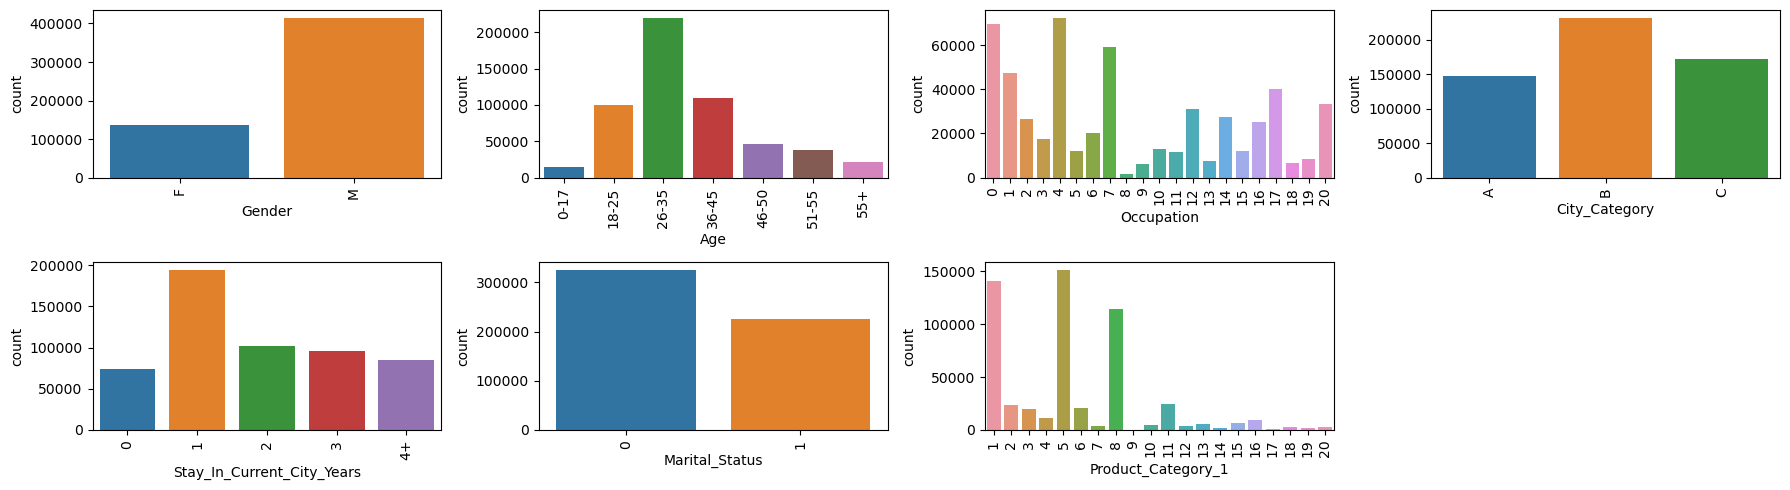

In [11]:
plt.figure(figsize=(18,5))
count=1
for column in categorical_list:
    plt.subplot(2,4,count)
    order = np.sort(df[column].unique())
    sns.countplot(x=pd.Categorical(df[column],order))
#     sns.countplot(data=dataset,x=column)
    plt.xlabel(column)
    plt.xticks(rotation=90)
    count+=1
plt.tight_layout()

"Se este conjunto de dados representar a população real, então devemos focar em:

Grupo de homens solteiros entre 26-35 anos de idade
Categoria de produtos 1, 5 e 8
Ocupação dos grupos 0, 4 e 7
Cidade B
Pessoas que estão morando na cidade há 1 ano
Em outro cenário, vamos investigar mais a fundo.

Vamos plotar a distribuição do valor mediano de compras em relação a essas colunas categóricas."

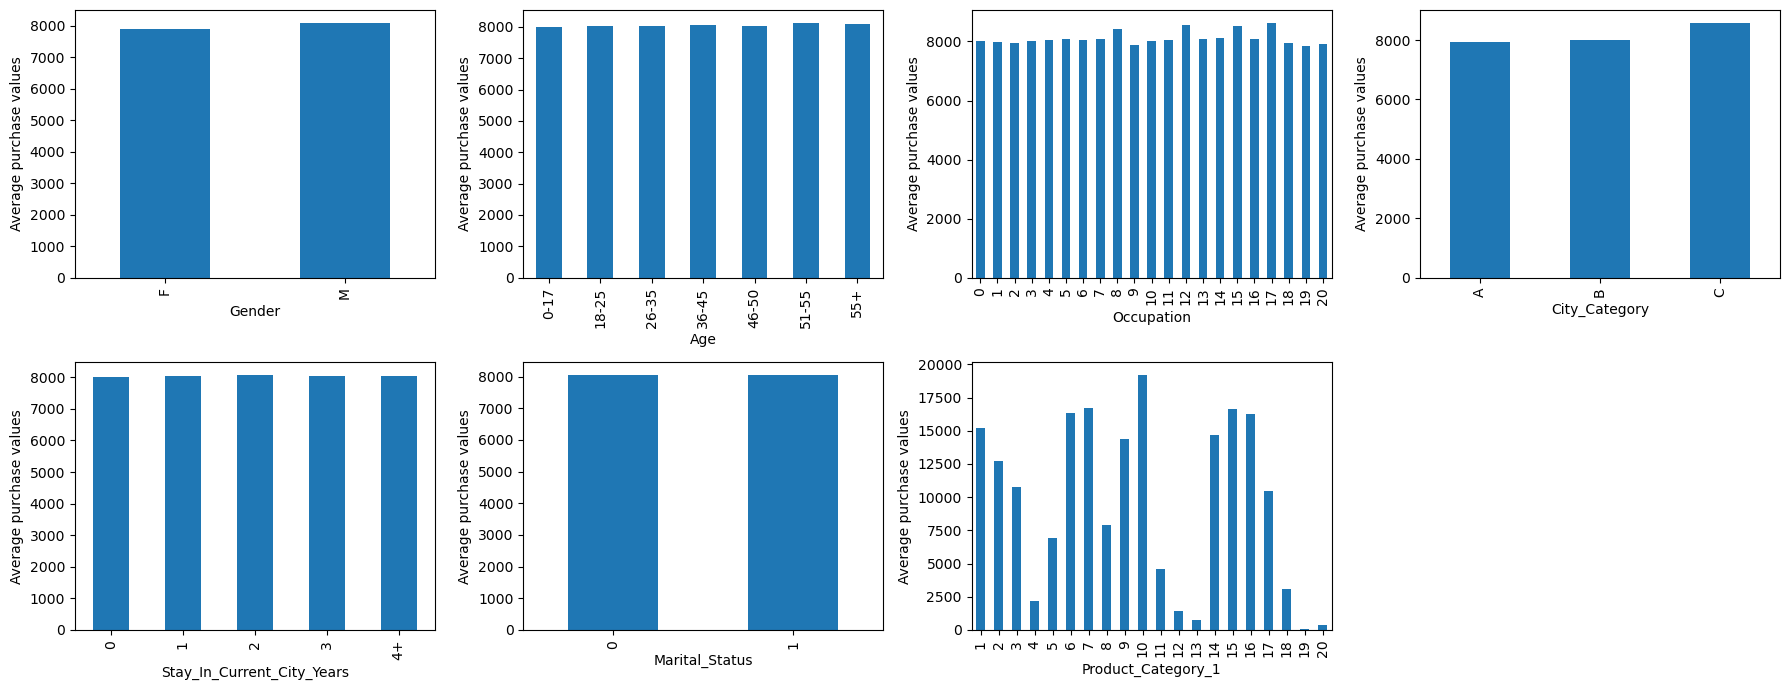

In [12]:
plt.figure(figsize=(18,7))
count=1
for column in categorical_list:
    plt.subplot(2,4,count)
    df.groupby(column,sort=True)["Purchase"].median().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Average purchase values")
    count+=1
plt.tight_layout()

Podemos ver que, se o conjunto de dados não for representativo da população real, a média de vendas é bastante semelhante na maioria das colunas.

In [30]:
df["Product_ID"] = df["Product_ID"].str.strip("P")

In [32]:
df["Product_ID"] = df["Product_ID"].astype(int)

Product_ID
265242    1880
25442     1615
110742    1612
112142    1562
57642     1470
          ... 
314842       1
298842       1
231642       1
204442       1
66342        1
Name: count, Length: 3631, dtype: int64


<Axes: ylabel='Frequency'>

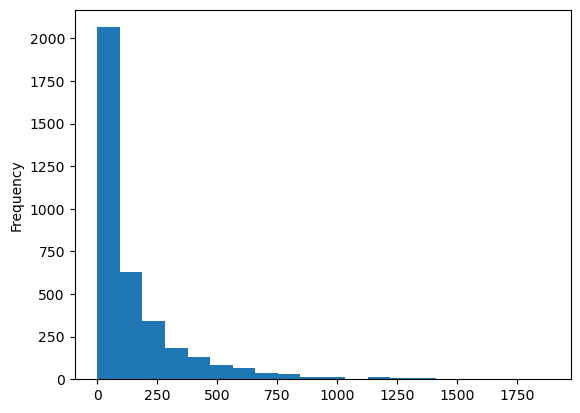

In [36]:
x = df["Product_ID"].value_counts()
print(x)
x.plot(kind="hist",bins=20)

In [38]:
top_20_products = df.groupby("Product_ID")["Purchase"].sum().sort_values(ascending=False)[:20]  

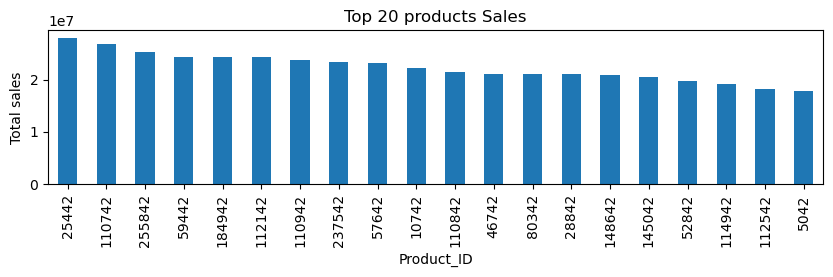

In [40]:
plt.figure(figsize=(10,2))
top_20_products.plot(kind="bar")
plt.title("Top 20 products Sales")
_ = plt.ylabel("Total sales")

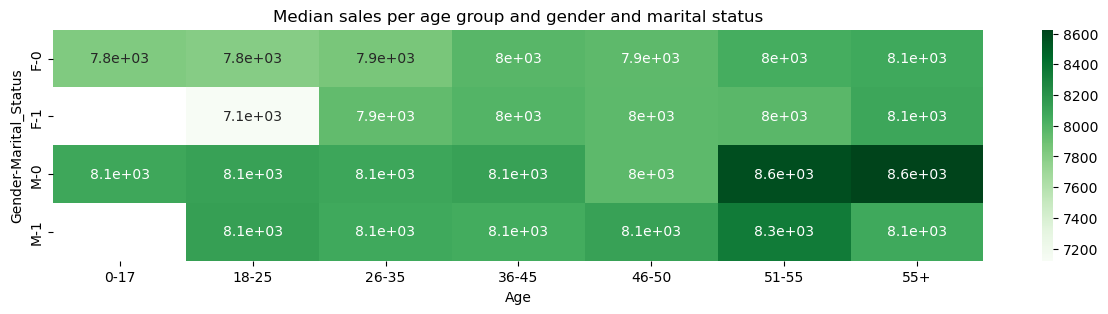

In [44]:
plt.figure(figsize=(15,3))
plt.title("Median sales per age group and gender and marital status")
_ = sns.heatmap(df.groupby(["Gender","Marital_Status","Age"])["Purchase"].median().unstack(),cmap="Greens",annot=True)

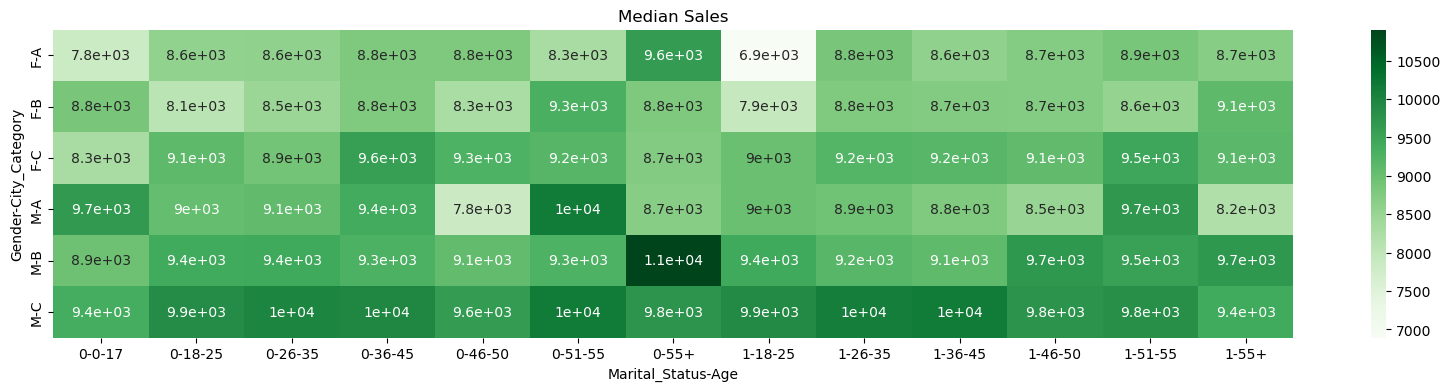

In [47]:
table = pd.pivot_table(data=df,index=["Gender","City_Category"],columns=["Marital_Status","Age"],values="Purchase",aggfunc="mean")
plt.figure(figsize=(20,4))
sns.heatmap(table,cmap="Greens",annot=True)
_ = plt.title("Median Sales")

Se nos concentrarmos na mediana, devemos concentrar-nos principalmente na população masculina e com mais de 46 anos de idade

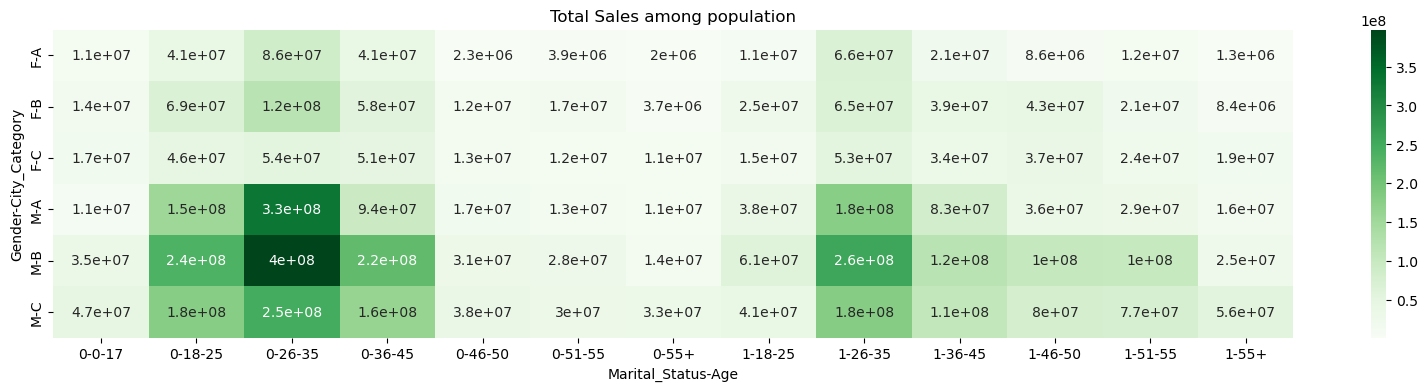

In [51]:
table = pd.pivot_table(data=df,index=["Gender","City_Category"],columns=["Marital_Status","Age"],values="Purchase",aggfunc="sum")
plt.figure(figsize=(20,4))
sns.heatmap(table,cmap="Greens",annot=True)
_ = plt.title("Total Sales among population")

Se nos concentrarmos na soma total, ou seja, quando o conjunto de dados é realmente representativo da população, devemos nos concentrar na faixa etária mais baixa da população masculina.